In [1]:
# imports
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
#from keras.callbacks import ModelCheckpoint
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel
from keras.models import Sequential
from keras.layers import LSTM, Dense,GRU,RNN,SimpleRNN,Dropout,Activation,Softmax,regularizers
from keras.models import load_model
from keras import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from numpy import array
from scipy.sparse import csr_matrix
from keras.models import Sequential
from keras.layers import LSTM, Dense,GRU,RNN,SimpleRNN,Dropout,RepeatVector,TimeDistributed
from keras.models import load_model
from keras.datasets import imdb
from keras.preprocessing import sequence
from sklearn.preprocessing import OneHotEncoder
import csv
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split as split
from catboost import CatBoostClassifier
from sklearn import svm
from sklearn.decomposition import PCA, KernelPCA

Using TensorFlow backend.


In [2]:
file = pd.read_csv(r"C:\Users\Ashafir\Desktop\diabetes.csv", encoding='utf-8')
file.rename(columns={'Outcome': 'Bypass'}, inplace=True)
file.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Bypass
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
X_train, X_test, y_train, y_test = split(file.drop('Bypass', axis=1), file['Bypass'])

XGBoost

In [4]:
#XGBoost Hyperparameter Tuning

#XGB param
learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
n_estimators = [50, 100, 150, 200]
max_depth = [2, 4, 6, 8]
param_grid = dict(max_depth=max_depth, n_estimators=n_estimators,learning_rate=learning_rate)

model = XGBClassifier()

#grid_search 
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))




C:\Users\Ashafir\AppData\Local\Continuum\miniconda3\envs\tensorflowproject\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best: -0.446707 using {'n_estimators': 100, 'max_depth': 2, 'learning_rate': 0.1}


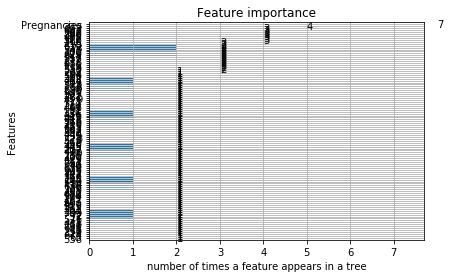

accuracy =  0.6614583333333334


In [155]:

# fit model on training data
model = XGBClassifier(max_depth=2, n_estimators=50,learning_rate=0.2)
model.fit(X_train, y_train)
    # plot feature importance
plot_importance(model,importance_type ='weight',xlabel ='number of times a feature appears in a tree')
pyplot.show()

y_pred = model.predict(X_test)
print("accuracy = " ,accuracy_score(y_test, y_pred))


CatBoost

In [138]:
# Initialize CatBoostClassifier
#cat_features=[0]
cat = CatBoostClassifier (cat_features=cat_features)#cat_features=cat_features
# Fit model
cat.fit(X_train, y_train)
# Get predictions
y_pred = cat.predict(X_test)
print("accuracy = " ,accuracy_score(y_test, y_pred))

Learning rate set to 0.014333
0:	learn: 0.6864055	total: 31.6ms	remaining: 31.6s
1:	learn: 0.6796766	total: 60.4ms	remaining: 30.1s
2:	learn: 0.6738086	total: 89.1ms	remaining: 29.6s
3:	learn: 0.6663259	total: 116ms	remaining: 29s
4:	learn: 0.6602060	total: 148ms	remaining: 29.5s
5:	learn: 0.6532599	total: 176ms	remaining: 29.2s
6:	learn: 0.6469240	total: 207ms	remaining: 29.4s
7:	learn: 0.6419975	total: 246ms	remaining: 30.5s
8:	learn: 0.6371308	total: 280ms	remaining: 30.8s
9:	learn: 0.6320975	total: 307ms	remaining: 30.3s
10:	learn: 0.6275091	total: 334ms	remaining: 30.1s
11:	learn: 0.6231029	total: 361ms	remaining: 29.8s
12:	learn: 0.6173732	total: 388ms	remaining: 29.5s
13:	learn: 0.6134486	total: 423ms	remaining: 29.8s
14:	learn: 0.6108824	total: 440ms	remaining: 28.9s
15:	learn: 0.6051891	total: 465ms	remaining: 28.6s
16:	learn: 0.5997087	total: 494ms	remaining: 28.5s
17:	learn: 0.5950624	total: 522ms	remaining: 28.5s
18:	learn: 0.5911810	total: 549ms	remaining: 28.3s
19:	learn:

166:	learn: 0.4010292	total: 4.36s	remaining: 21.7s
167:	learn: 0.4008957	total: 4.37s	remaining: 21.6s
168:	learn: 0.4006723	total: 4.39s	remaining: 21.6s
169:	learn: 0.4001365	total: 4.42s	remaining: 21.6s
170:	learn: 0.3994624	total: 4.44s	remaining: 21.5s
171:	learn: 0.3989475	total: 4.47s	remaining: 21.5s
172:	learn: 0.3984995	total: 4.5s	remaining: 21.5s
173:	learn: 0.3979485	total: 4.52s	remaining: 21.5s
174:	learn: 0.3976556	total: 4.55s	remaining: 21.5s
175:	learn: 0.3972163	total: 4.58s	remaining: 21.5s
176:	learn: 0.3967376	total: 4.61s	remaining: 21.4s
177:	learn: 0.3959412	total: 4.64s	remaining: 21.4s
178:	learn: 0.3958355	total: 4.66s	remaining: 21.4s
179:	learn: 0.3955730	total: 4.68s	remaining: 21.3s
180:	learn: 0.3953313	total: 4.7s	remaining: 21.3s
181:	learn: 0.3949614	total: 4.73s	remaining: 21.3s
182:	learn: 0.3947198	total: 4.76s	remaining: 21.2s
183:	learn: 0.3944294	total: 4.78s	remaining: 21.2s
184:	learn: 0.3942557	total: 4.79s	remaining: 21.1s
185:	learn: 0.

329:	learn: 0.3533797	total: 8.2s	remaining: 16.6s
330:	learn: 0.3533282	total: 8.21s	remaining: 16.6s
331:	learn: 0.3531204	total: 8.24s	remaining: 16.6s
332:	learn: 0.3528705	total: 8.26s	remaining: 16.6s
333:	learn: 0.3526795	total: 8.29s	remaining: 16.5s
334:	learn: 0.3525595	total: 8.32s	remaining: 16.5s
335:	learn: 0.3523449	total: 8.34s	remaining: 16.5s
336:	learn: 0.3520520	total: 8.36s	remaining: 16.4s
337:	learn: 0.3520291	total: 8.37s	remaining: 16.4s
338:	learn: 0.3520290	total: 8.38s	remaining: 16.3s
339:	learn: 0.3519764	total: 8.39s	remaining: 16.3s
340:	learn: 0.3516862	total: 8.42s	remaining: 16.3s
341:	learn: 0.3516353	total: 8.45s	remaining: 16.3s
342:	learn: 0.3514325	total: 8.48s	remaining: 16.2s
343:	learn: 0.3506663	total: 8.5s	remaining: 16.2s
344:	learn: 0.3502940	total: 8.53s	remaining: 16.2s
345:	learn: 0.3501869	total: 8.55s	remaining: 16.2s
346:	learn: 0.3499310	total: 8.58s	remaining: 16.1s
347:	learn: 0.3497766	total: 8.61s	remaining: 16.1s
348:	learn: 0.

493:	learn: 0.3214147	total: 12.2s	remaining: 12.5s
494:	learn: 0.3212697	total: 12.2s	remaining: 12.4s
495:	learn: 0.3212571	total: 12.2s	remaining: 12.4s
496:	learn: 0.3208768	total: 12.2s	remaining: 12.4s
497:	learn: 0.3207550	total: 12.3s	remaining: 12.4s
498:	learn: 0.3206091	total: 12.3s	remaining: 12.3s
499:	learn: 0.3204181	total: 12.3s	remaining: 12.3s
500:	learn: 0.3202394	total: 12.4s	remaining: 12.3s
501:	learn: 0.3201926	total: 12.4s	remaining: 12.3s
502:	learn: 0.3200061	total: 12.4s	remaining: 12.2s
503:	learn: 0.3196598	total: 12.4s	remaining: 12.2s
504:	learn: 0.3196371	total: 12.4s	remaining: 12.2s
505:	learn: 0.3195014	total: 12.5s	remaining: 12.2s
506:	learn: 0.3193576	total: 12.5s	remaining: 12.1s
507:	learn: 0.3192694	total: 12.5s	remaining: 12.1s
508:	learn: 0.3191386	total: 12.5s	remaining: 12.1s
509:	learn: 0.3190978	total: 12.6s	remaining: 12.1s
510:	learn: 0.3187352	total: 12.6s	remaining: 12.1s
511:	learn: 0.3186578	total: 12.6s	remaining: 12s
512:	learn: 0.

653:	learn: 0.2902191	total: 16.4s	remaining: 8.65s
654:	learn: 0.2898375	total: 16.4s	remaining: 8.63s
655:	learn: 0.2896784	total: 16.4s	remaining: 8.61s
656:	learn: 0.2896673	total: 16.4s	remaining: 8.58s
657:	learn: 0.2894699	total: 16.5s	remaining: 8.55s
658:	learn: 0.2894320	total: 16.5s	remaining: 8.53s
659:	learn: 0.2894220	total: 16.5s	remaining: 8.5s
660:	learn: 0.2892414	total: 16.5s	remaining: 8.47s
661:	learn: 0.2888858	total: 16.6s	remaining: 8.45s
662:	learn: 0.2887911	total: 16.6s	remaining: 8.43s
663:	learn: 0.2886585	total: 16.6s	remaining: 8.4s
664:	learn: 0.2883877	total: 16.6s	remaining: 8.38s
665:	learn: 0.2883504	total: 16.7s	remaining: 8.36s
666:	learn: 0.2883106	total: 16.7s	remaining: 8.33s
667:	learn: 0.2882391	total: 16.7s	remaining: 8.31s
668:	learn: 0.2881104	total: 16.7s	remaining: 8.29s
669:	learn: 0.2880577	total: 16.8s	remaining: 8.26s
670:	learn: 0.2879282	total: 16.8s	remaining: 8.24s
671:	learn: 0.2877483	total: 16.8s	remaining: 8.21s
672:	learn: 0.

812:	learn: 0.2652080	total: 20.7s	remaining: 4.76s
813:	learn: 0.2651472	total: 20.7s	remaining: 4.74s
814:	learn: 0.2649206	total: 20.8s	remaining: 4.71s
815:	learn: 0.2647579	total: 20.8s	remaining: 4.69s
816:	learn: 0.2646179	total: 20.8s	remaining: 4.66s
817:	learn: 0.2645846	total: 20.8s	remaining: 4.64s
818:	learn: 0.2644697	total: 20.9s	remaining: 4.61s
819:	learn: 0.2643407	total: 20.9s	remaining: 4.59s
820:	learn: 0.2641485	total: 20.9s	remaining: 4.56s
821:	learn: 0.2638176	total: 21s	remaining: 4.54s
822:	learn: 0.2637195	total: 21s	remaining: 4.51s
823:	learn: 0.2634275	total: 21s	remaining: 4.49s
824:	learn: 0.2633640	total: 21s	remaining: 4.46s
825:	learn: 0.2632761	total: 21.1s	remaining: 4.44s
826:	learn: 0.2632224	total: 21.1s	remaining: 4.41s
827:	learn: 0.2631734	total: 21.1s	remaining: 4.39s
828:	learn: 0.2630927	total: 21.2s	remaining: 4.36s
829:	learn: 0.2627744	total: 21.2s	remaining: 4.34s
830:	learn: 0.2626776	total: 21.2s	remaining: 4.31s
831:	learn: 0.262627

975:	learn: 0.2449638	total: 25.2s	remaining: 620ms
976:	learn: 0.2448545	total: 25.2s	remaining: 594ms
977:	learn: 0.2448520	total: 25.3s	remaining: 568ms
978:	learn: 0.2448217	total: 25.3s	remaining: 542ms
979:	learn: 0.2446922	total: 25.3s	remaining: 517ms
980:	learn: 0.2446396	total: 25.3s	remaining: 491ms
981:	learn: 0.2446235	total: 25.4s	remaining: 465ms
982:	learn: 0.2445672	total: 25.4s	remaining: 439ms
983:	learn: 0.2444136	total: 25.4s	remaining: 414ms
984:	learn: 0.2441769	total: 25.5s	remaining: 388ms
985:	learn: 0.2440179	total: 25.5s	remaining: 362ms
986:	learn: 0.2438920	total: 25.5s	remaining: 336ms
987:	learn: 0.2438576	total: 25.5s	remaining: 310ms
988:	learn: 0.2437254	total: 25.6s	remaining: 284ms
989:	learn: 0.2437025	total: 25.6s	remaining: 259ms
990:	learn: 0.2435517	total: 25.6s	remaining: 233ms
991:	learn: 0.2434941	total: 25.7s	remaining: 207ms
992:	learn: 0.2434245	total: 25.7s	remaining: 181ms
993:	learn: 0.2432936	total: 25.7s	remaining: 155ms
994:	learn: 

AdaBoost

In [156]:
# Initialize AdaBoostClassifier

Ad = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1))


# Fit model
Ad.fit(X_train, y_train)
# Get predictions
y_pred = Ad.predict(X_test)
print("accuracy = " ,accuracy_score(y_test, y_pred))

accuracy =  0.5833333333333334


GradientBoosting

In [157]:
# Initialize GradientBoostingClassifier

Grad = GradientBoostingClassifier()
# Fit model
Grad.fit(X_train, y_train)
# Get predictions
y_pred = Grad.predict(X_test)
print("accuracy = " ,accuracy_score(y_test, y_pred))

accuracy =  0.625
